# Pre - Processing Data to be used in Matlab

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Data Vis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import matplotlib.style as style
style.use('fivethirtyeight')

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

# We can also use whitegrid style for our seaborn plots.( most basic one )
sns.set(style='white', context='notebook', palette='deep') 

# File system manangement
import os
    
def glimpse(df, maxvals=10, maxlen=110):
    print('Shape: ', df.shape)
    print('')
    print(df.dtypes.value_counts())
    print('')
    def pad(y):
        max_len = max([len(x) for x in y])
        return [x.ljust(max_len) for x in y]
    
    # Column Name
    toprnt = pad(df.columns.tolist())
    
    # Column Type
    toprnt = pad([toprnt[i] + ' ' + str(df.iloc[:,i].dtype) for i in range(df.shape[1])])
    
    # Num NAs
    num_nas = [df.iloc[:,i].isnull().sum() for i in range(df.shape[1])]
    num_nas_ratio = [int(round(x*100/df.shape[0])) for x in num_nas]
    num_nas_str = [str(x) + ' (' + str(y) + '%)' for x,y in zip(num_nas, num_nas_ratio)]
    max_len = max([len(x) for x in num_nas_str])
    num_nas_str = [x.rjust(max_len) for x in num_nas_str]
    toprnt = [x + ' ' + y + ' NAs' for x,y in zip(toprnt, num_nas_str)]
    
    # Separator
    toprnt = [x + ' ; Unique ' for x in toprnt]
    
    # Values
    toprnt = [toprnt[i] + '('+str(df.iloc[:,i].nunique())+') : ' 
              +str(df.iloc[:,i].unique()[:5]) for i in range(df.shape[1])]
    
    # Trim to maxlen
    toprnt = [x[:min(maxlen, len(x))] for x in toprnt]
    
    for x in toprnt:
        print(x)
    display(df.describe())
    print('Head')
    display(df.head())
    print('Tail')
    display(df.tail())

In [2]:
CO_data = pd.read_csv("ethylene_CO.csv")
target = ["CO conc (ppm)","Ethylene conc (ppm)"]
CO_data.iloc[:,0] = np.array(range(0,4208261,1))/100
# Sampling Frequency of 1 Sec and not 0.01 sec
a = np.where(CO_data.iloc[:,0]-np.floor(CO_data.iloc[:,0]) == 0,1,0)
CO_data = CO_data[a==1]
# Sampling Frequency of 25 Sec and not 1 sec
a = np.where(CO_data.iloc[:,0]/25-CO_data.iloc[:,0]//25 == 0,1,0)
CO_data = CO_data[a==1]

In [3]:
CO_data.to_csv("CO_per25Sec.csv", index = None, header=True)

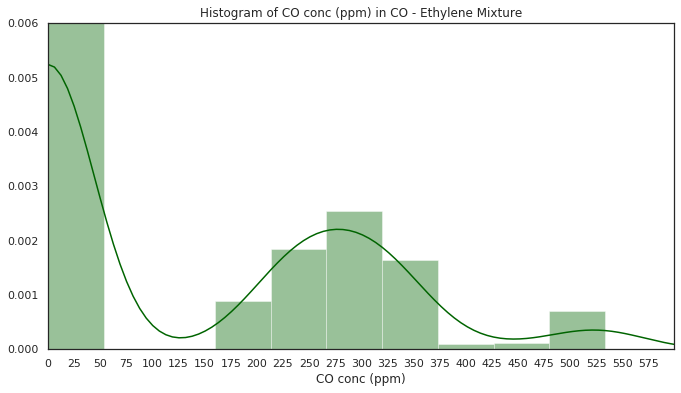

In [11]:
plt.figure(figsize=(10,6))
x = range(0,600,25)
sns.distplot(CO_data[target[0]], color="darkgreen", hist_kws={'alpha': 0.4})#, fit=norm)
plt.title('Histogram of %s in CO - Ethylene Mixture' % target[0])
plt.xticks(x)
plt.axis([0, 600, 0, 0.006])
plt.show()

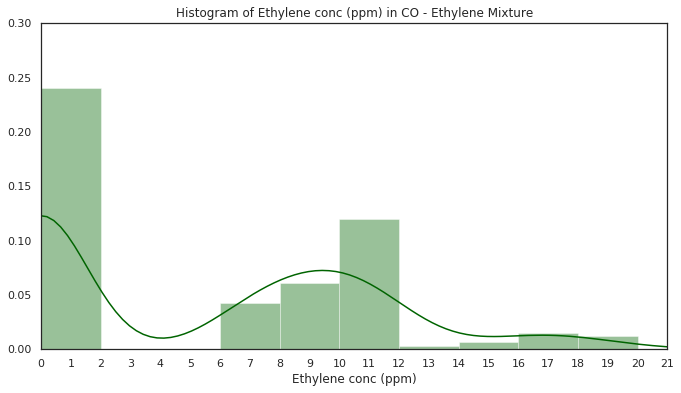

In [32]:
plt.figure(figsize=(10,6))
x = range(0,22,1)
sns.distplot(CO_data[target[1]], color='darkgreen', hist_kws={'alpha': 0.4})#, fit=norm)
plt.title('Histogram of %s in CO - Ethylene Mixture' % target[1])
plt.xticks(x)
plt.axis([0, 21, 0, 0.3])
plt.show()

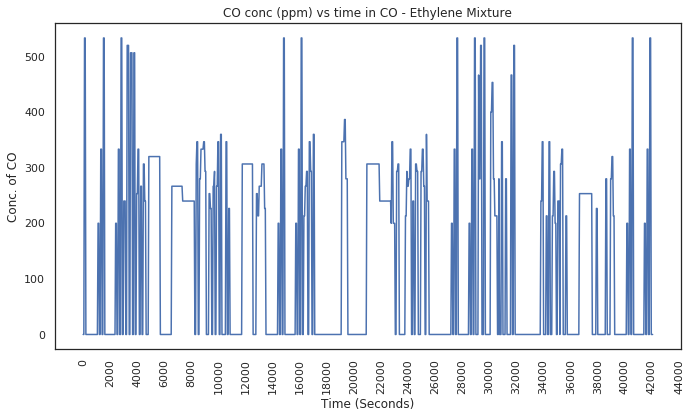

In [13]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data[target[0]])
plt.title('%s vs time in CO - Ethylene Mixture' % target[0])
plt.ylabel("Conc. of CO")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

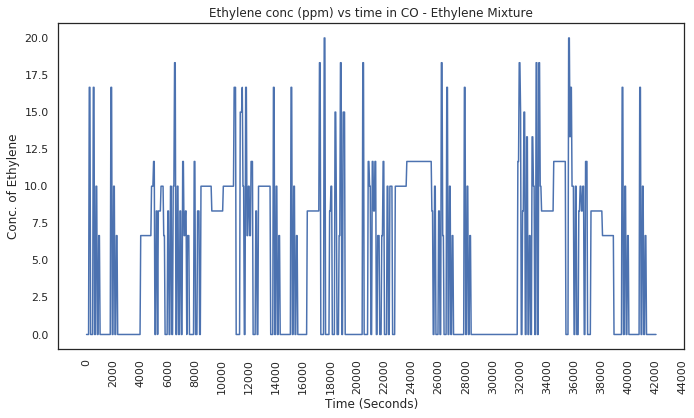

In [14]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data[target[1]])
plt.title('%s vs time in CO - Ethylene Mixture' % target[1])
plt.ylabel("Conc. of Ethylene")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

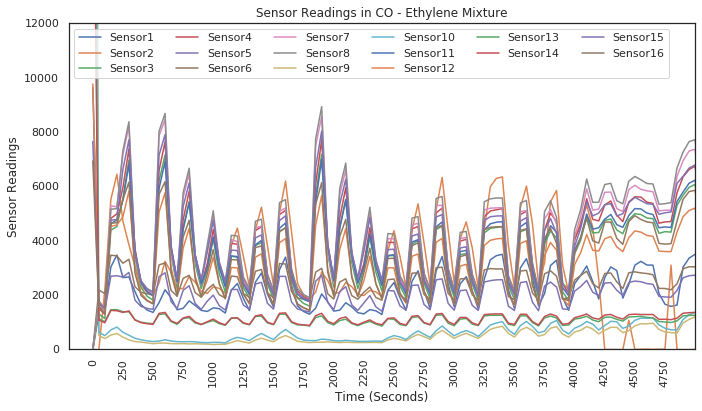

In [15]:
target = ["CO conc (ppm)","Ethylene conc (ppm)"]
plt.figure(figsize=(10,6))
x = range(0,5000,250)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor1"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor2"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor3"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor4"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor5"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor6"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor7"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor8"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor9"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor10"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor11"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor12"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor13"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor14"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor15"])
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor16"])
plt.title('Sensor Readings in CO - Ethylene Mixture' )
plt.gca().legend(('Sensor1','Sensor2', 'Sensor3', 'Sensor4',
                  'Sensor5', 'Sensor6', 'Sensor7', 'Sensor8',
                  'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12',
                  'Sensor13','Sensor14', 'Sensor15', 'Sensor16'),bbox_to_anchor=(0, 1), loc='upper left', ncol=6)#loc='best')
plt.ylabel("Sensor Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([-200,5000, 0, 12000])
plt.show()

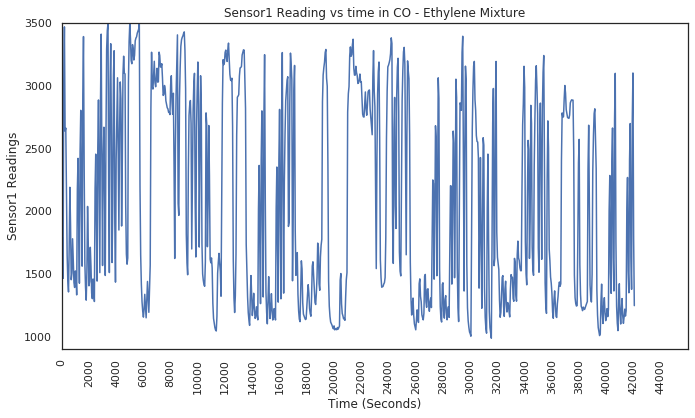

In [16]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor1"])
plt.title('Sensor1 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor1 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([0,46000, 900, 3500])
plt.show()

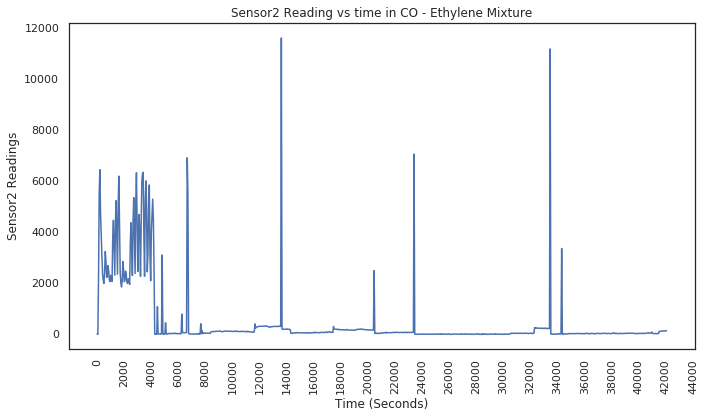

In [17]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor2"])
plt.title('Sensor2 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor2 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

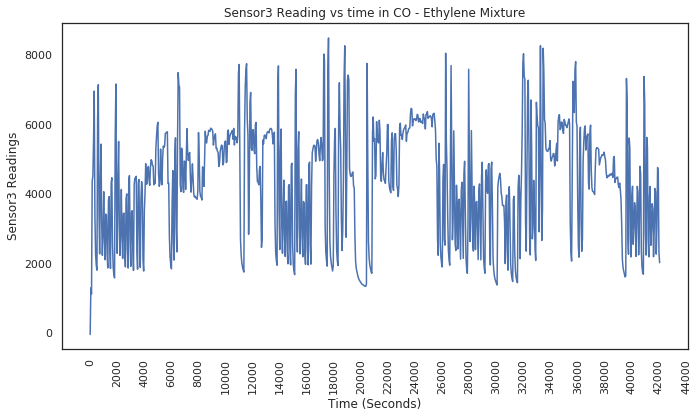

In [18]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor3"])
plt.title('Sensor3 Reading vs time in CO - Ethylene Mixture')
plt.ylabel("Sensor3 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

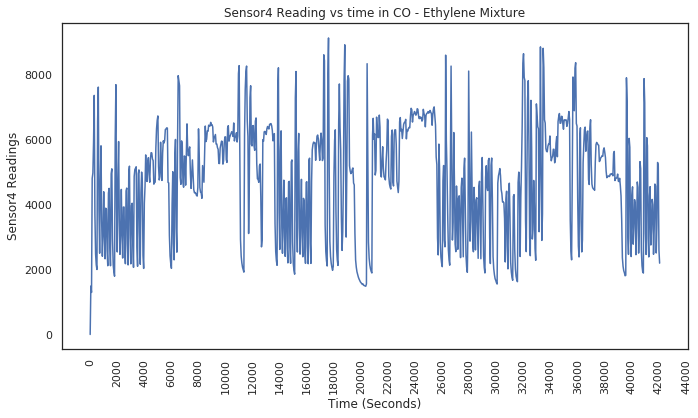

In [19]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor4"])
plt.title('Sensor4 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor4 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

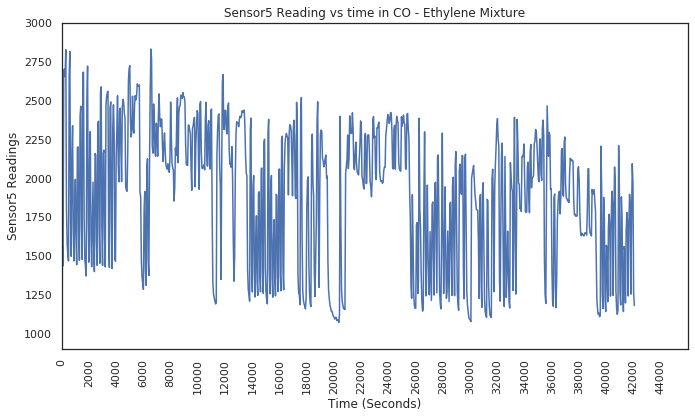

In [20]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor5"])
plt.title('Sensor5 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor5 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([0,46000, 900, 3000])
plt.show()

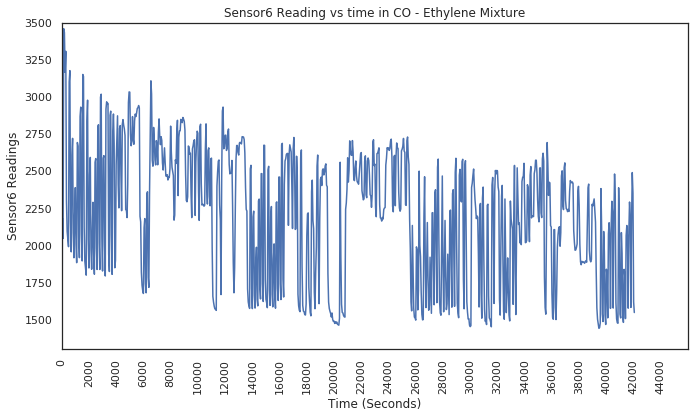

In [21]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor6"])
plt.title('Sensor6 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor6 Readings")
plt.xlabel("Time (Seconds)")
plt.axis([0,46000, 1300, 3500])
plt.xticks(x,rotation=90)
plt.show()

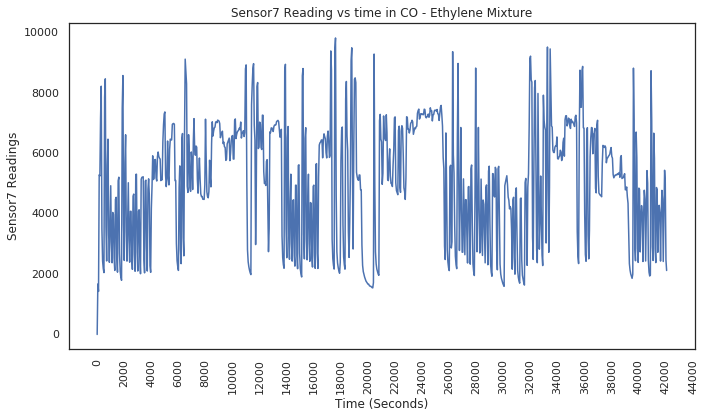

In [22]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor7"])
plt.title('Sensor7 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor7 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

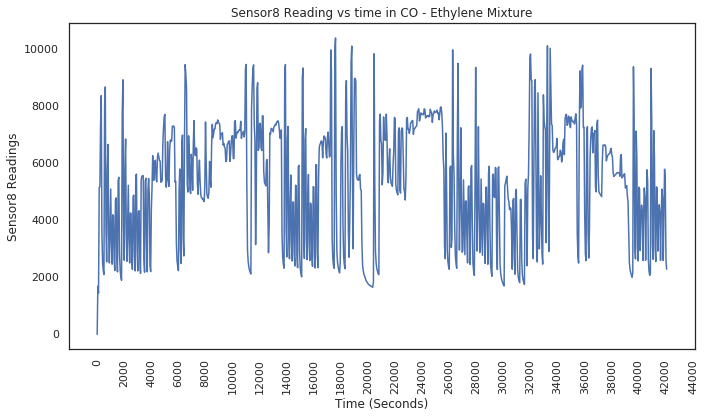

In [23]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor8"])
plt.title('Sensor8 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor8 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

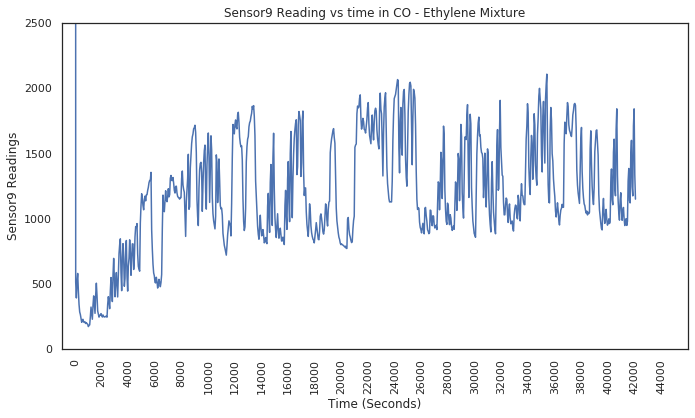

In [24]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor9"])
plt.title('Sensor9 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor9 Readings")
plt.xlabel("Time (Seconds)")
plt.axis([-1000,46000, 0, 2500])
plt.xticks(x,rotation=90)
plt.show()

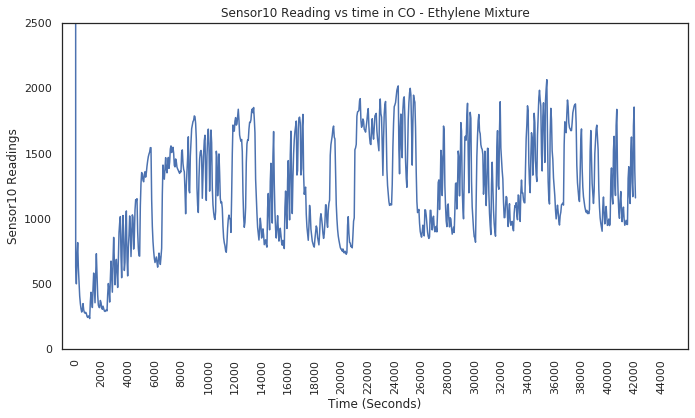

In [25]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor10"])
plt.title('Sensor10 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor10 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([-1000,46000, 0, 2500])
plt.show()

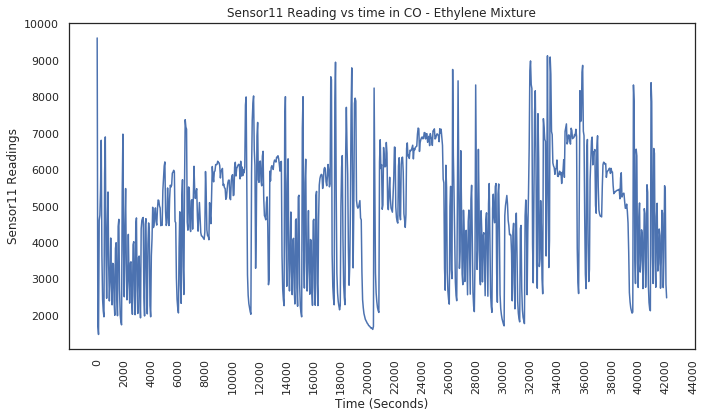

In [26]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor11"])
plt.title('Sensor11 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor11 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

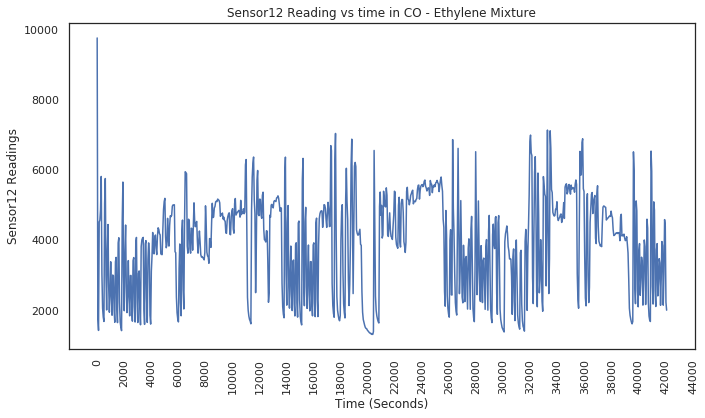

In [27]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor12"])
plt.title('Sensor12 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor12 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

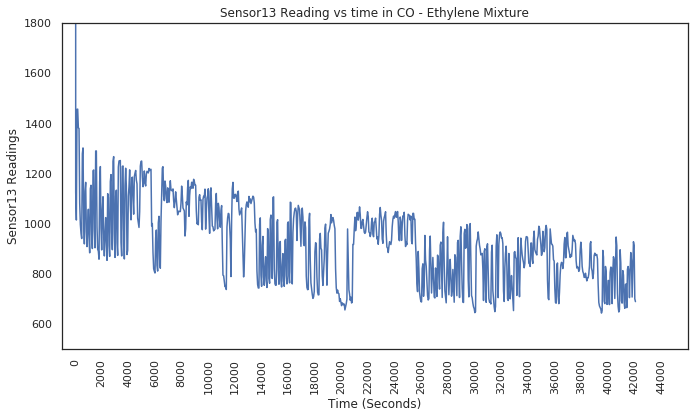

In [28]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor13"])
plt.title('Sensor13 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor13 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.axis([-1000,46000, 500, 1800])
plt.show()

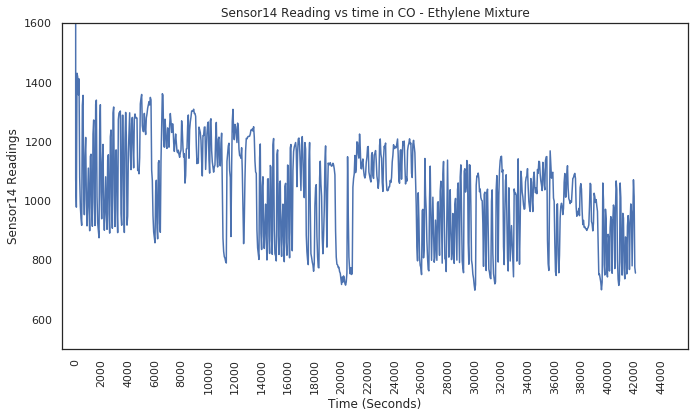

In [29]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor14"])
plt.title('Sensor14 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor14 Readings")
plt.xlabel("Time (Seconds)")
plt.axis([-1000,46000, 500, 1600])
plt.xticks(x,rotation=90)
plt.show()

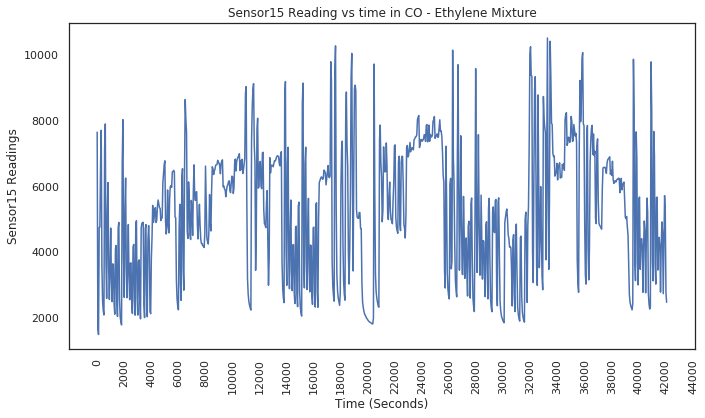

In [30]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor15"])
plt.title('Sensor15 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor15 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()

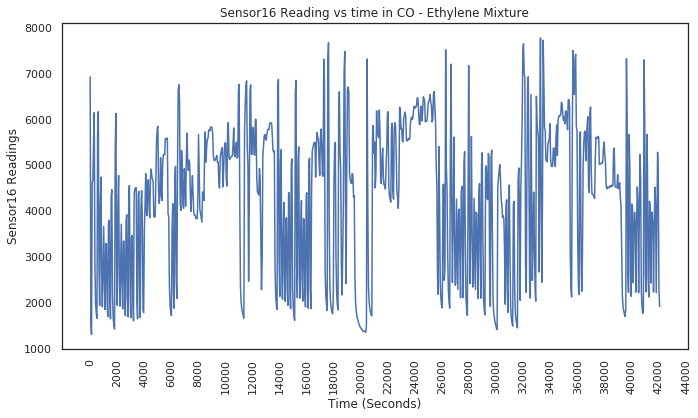

In [31]:
plt.figure(figsize=(10,6))
x = range(0,46000,2000)
plt.plot(CO_data["Time (seconds)"],CO_data["Sensor16"])
plt.title('Sensor16 Reading vs time in CO - Ethylene Mixture' )
plt.ylabel("Sensor16 Readings")
plt.xlabel("Time (Seconds)")
plt.xticks(x,rotation=90)
plt.show()